# Explore here

In [6]:
import pandas as pd

# Cargar dataset
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
df = pd.read_csv(url)

# Seleccionar columnas relevantes
df_kmeans = df[["Latitude", "Longitude", "MedInc"]]

# Verificar el estado del nuevo dataframe
print(df_kmeans.info())
print(df_kmeans.describe())
print(df_kmeans.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   20640 non-null  float64
 1   Longitude  20640 non-null  float64
 2   MedInc     20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB
None
           Latitude     Longitude        MedInc
count  20640.000000  20640.000000  20640.000000
mean      35.631861   -119.569704      3.870671
std        2.135952      2.003532      1.899822
min       32.540000   -124.350000      0.499900
25%       33.930000   -121.800000      2.563400
50%       34.260000   -118.490000      3.534800
75%       37.710000   -118.010000      4.743250
max       41.950000   -114.310000     15.000100
   Latitude  Longitude  MedInc
0     37.88    -122.23  8.3252
1     37.86    -122.22  8.3014
2     37.85    -122.24  7.2574
3     37.85    -122.25  5.6431
4     37.85    -122.25  3.8462


### Graficos Exploratorios

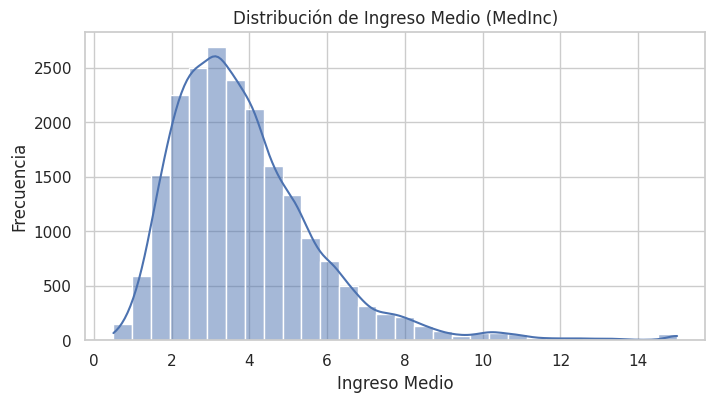

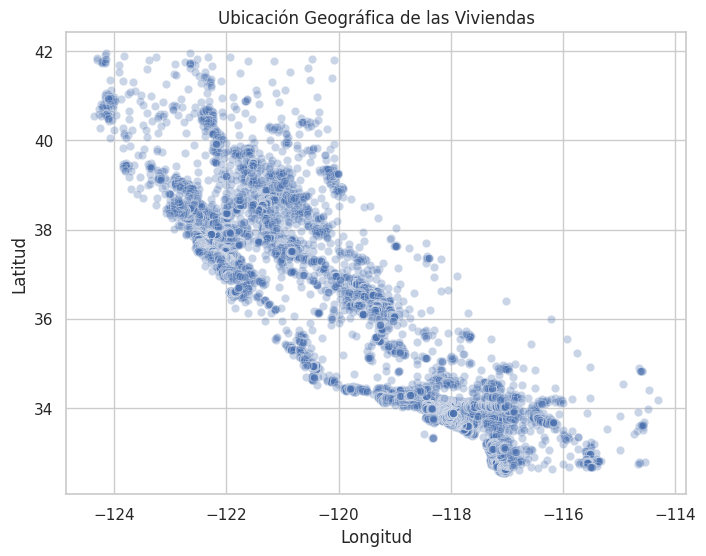

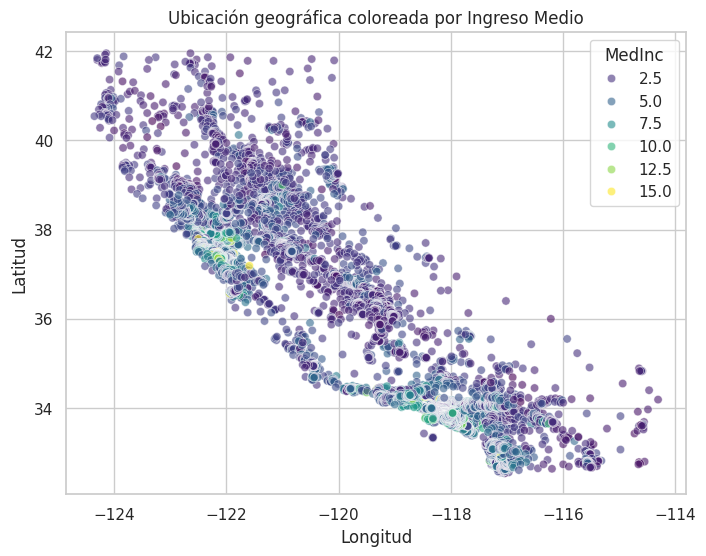

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual
sns.set(style="whitegrid")

# Histograma de MedInc
plt.figure(figsize=(8, 4))
sns.histplot(df_kmeans["MedInc"], bins=30, kde=True)
plt.title("Distribución de Ingreso Medio (MedInc)")
plt.xlabel("Ingreso Medio")
plt.ylabel("Frecuencia")
plt.show()

# Dispersión geográfica (Latitude vs Longitude)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_kmeans, x="Longitude", y="Latitude", alpha=0.3)
plt.title("Ubicación Geográfica de las Viviendas")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

# Dispersión geográfica con ingreso medio como color
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_kmeans, x="Longitude", y="Latitude", hue="MedInc", palette="viridis", alpha=0.6)
plt.title("Ubicación geográfica coloreada por Ingreso Medio")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

##### K-Means se ve muy afectado por la escala, así que normalizamos los datos con StandardScaler:

In [8]:
from sklearn.preprocessing import StandardScaler

# Inicializar el scaler
scaler = StandardScaler()

# Ajustar y transformar los datos
X_scaled = scaler.fit_transform(df_kmeans)

# Convertir de nuevo a DataFrame si querés mantener etiquetas de columnas
df_scaled = pd.DataFrame(X_scaled, columns=df_kmeans.columns)

# Verificar los datos escalados
print(df_scaled.head())


   Latitude  Longitude    MedInc
0  1.052548  -1.327835  2.344766
1  1.043185  -1.322844  2.332238
2  1.038503  -1.332827  1.782699
3  1.038503  -1.337818  0.932968
4  1.038503  -1.337818 -0.012881


##### Separamos data de entrenamiento y data de test

In [9]:
from sklearn.model_selection import train_test_split

# Split entre train y test (aunque no se use etiqueta, separamos para ajustar el modelo en train)
X_train, X_test = train_test_split(df_scaled, test_size=0.2, random_state=42)


##### Creamos el modelo con 6 clusters

In [10]:
from sklearn.cluster import KMeans

# Crear el modelo con 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)

# Ajustar el modelo sobre los datos de entrenamiento
kmeans.fit(X_train)

# Predecir los clusters para todos los datos (o podrías hacer solo test, según qué te pidan)
clusters = kmeans.predict(df_scaled)

# Añadir la columna al dataset original
df_kmeans["cluster"] = clusters


/tmp/ipykernel_1595/3301694070.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans["cluster"] = clusters


##### Categorizar la columna 'cluster'

In [11]:
df_kmeans["cluster"] = df_kmeans["cluster"].astype("category")


/tmp/ipykernel_1595/791042914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans["cluster"] = df_kmeans["cluster"].astype("category")


##### Gráfico de los clusters

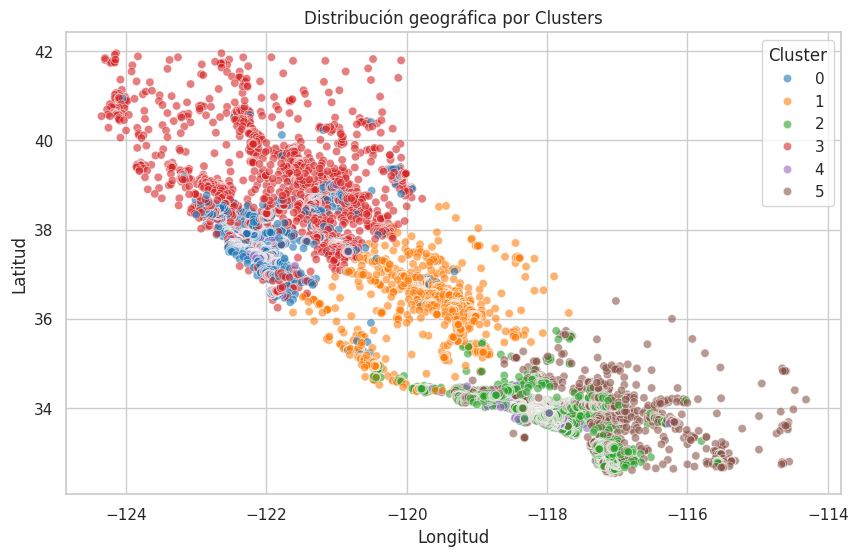

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_kmeans, x="Longitude", y="Latitude", hue="cluster", palette="tab10", alpha=0.6)
plt.title("Distribución geográfica por Clusters")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.legend(title="Cluster")
plt.show()


##### El gráfico muestra cómo K-Means agrupó las viviendas en 6 regiones distintas basadas en ubicación geográfica e ingreso medio. Lo más probable es que haya algunos clusters más costeros (California) y otros más hacia el interior, separados por patrones socioeconómicos.

##### Predecir los clusters del conjunto X_test

In [13]:
# Predecimos los clusters para el test
test_clusters = kmeans.predict(X_test)

# Creamos un DataFrame para graficar los puntos de test
df_test_clusters = pd.DataFrame(X_test, columns=["Latitude", "Longitude", "MedInc"])
df_test_clusters["cluster"] = test_clusters


##### Gráfico combinado: train vs test

TypeError: seaborn.utils._scatter_legend_artist() got multiple values for keyword argument 'label'

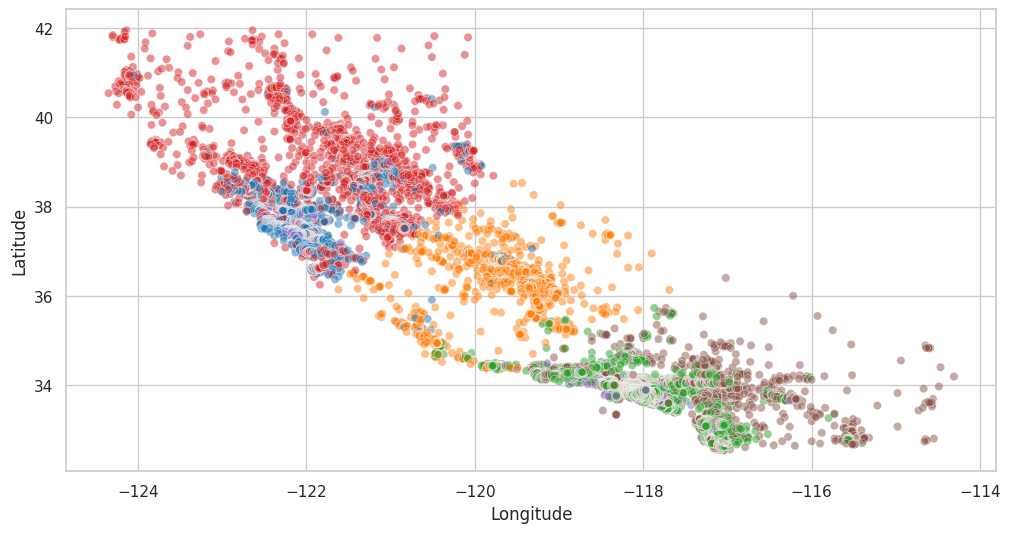

In [14]:
# Gráfico con datos de entrenamiento
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=df_kmeans["Longitude"], y=df_kmeans["Latitude"],
    hue=df_kmeans["cluster"], palette="tab10", alpha=0.5, label="Train"
)

# Agregamos los puntos del test set encima
sns.scatterplot(
    x=df_test_clusters["Longitude"], y=df_test_clusters["Latitude"],
    hue=df_test_clusters["cluster"], palette="tab10", marker="X", s=100, legend=False, label="Test"
)

plt.title("Clusters: Train (puntos) vs Test (X marcadas)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.legend()
plt.show()


##### Estadísticas por cluster

In [15]:
# Analizamos estadísticamente los clusters creados
df_kmeans.groupby("cluster")[["Latitude", "Longitude", "MedInc"]].mean().round(2)


/tmp/ipykernel_1595/3500818655.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_kmeans.groupby("cluster")[["Latitude", "Longitude", "MedInc"]].mean().round(2)


,Latitude,Longitude,MedInc
cluster,,,
0,37.71,-121.95,5.51
1,36.11,-119.73,2.62
2,33.86,-118.02,5.30
3,38.35,-121.90,2.83
4,34.87,-119.20,10.46
5,33.82,-117.82,2.79


#### Entrenar un modelo supervisado (Árbol de Decisión)

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Obtenemos las etiquetas del K-Means para los datos de entrenamiento
y_train_cluster = kmeans.labels_

# Entrenamiento
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train_cluster)

# Predicciones sobre el test
y_pred = clf.predict(X_test)

# Evaluación
print(confusion_matrix(test_clusters, y_pred))
print(classification_report(test_clusters, y_pred))


[[ 504    0    0   10    0    0]
 [  11  303   16    6    0    1]
 [   0    0  806    0    4   19]
 [  13    4    0  945    0    0]
 [   3    0    2    0  107    0]
 [   0    9   12    0    0 1353]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       514
           1       0.96      0.90      0.93       337
           2       0.96      0.97      0.97       829
           3       0.98      0.98      0.98       962
           4       0.96      0.96      0.96       112
           5       0.99      0.98      0.99      1374

    accuracy                           0.97      4128
   macro avg       0.97      0.96      0.96      4128
weighted avg       0.97      0.97      0.97      4128



#### Guardo los modelos

In [20]:
import joblib

# Guardar el modelo K-Means
joblib.dump(kmeans, '/workspaces/LucasDellaMaestra-Kmeans/models/kmeans_model.pkl')

# Guardar el modelo supervisado (ej. Árbol de Decisión)
joblib.dump(clf, '/workspaces/LucasDellaMaestra-Kmeans/models/decision_tree_model.pkl')


['/workspaces/LucasDellaMaestra-Kmeans/models/decision_tree_model.pkl']